In [206]:
import pandas as pd
import os
import sys
import missingno as msno

# Importing the data

In [207]:
os.getcwd()

'C:\\Users\\kople\\Documents\\Personal Git repos\\Water-Quality-Prediction\\notebooks'

In [208]:
df = pd.read_csv('C:/Users/kople/Documents/Personal Git repos/Water-Quality-Prediction/data/raw/water_dataX.csv',encoding='ISO-8859-1')

In [209]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

# EDA on Indian dataset

In [211]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

Converting the columns to numeric type

In [212]:
df['STATION CODE']= pd.to_numeric(df['STATION CODE'],errors='coerce')

In [213]:
df[df['STATION CODE'].isnull()]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
260,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,2013
431,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,2013
1782,NaN,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",NAN,28,5.6,7.65,375.2,1.758,1.995,2636,18417,2005
1783,NaN,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",NAN,NAN,NAN,7.76,233.3,10.825,5.657,NAN,NAN,2005
1784,NaN,"DAMANGANGA AFTER CONFL. OF PIPARIA DRAIN, DAMAN",NAN,NAN,NAN,NAN,NAN,1,1.01,1200,37000,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,NaN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,28,6.6,7.49,571.5,2.091,0.256,151,273,2005
1898,NaN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,5.4,7.16,75.8,2.092,NAN,404,513,2005
1899,NaN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,30,5.4,7.37,104.8,1.802,0.215,456,557,2005
1900,NaN,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,5.3,7.37,102.2,2.552,0.202,526,583,2005


In [214]:
df['Temp']= pd.to_numeric(df['Temp'],errors='coerce')

In [215]:
df['D.O. (mg/l)']= pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')

In [216]:
df['PH']= pd.to_numeric(df['PH'],errors='coerce')

In [217]:
df['CONDUCTIVITY (µmhos/cm)']= pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')

In [218]:
df['B.O.D. (mg/l)']= pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')

In [219]:
df['NITRATENAN N+ NITRITENANN (mg/l)']= pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')

In [220]:
df['FECAL COLIFORM (MPN/100ml)']= pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'],errors='coerce')

In [221]:
df['TOTAL COLIFORM (MPN/100ml)Mean']= pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [222]:
df.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [223]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


# Renaming columns

In [224]:
df.rename(columns={"STATION CODE":"station","LOCATIONS":"location","STATE":"state","D.O. (mg/l)":"do","PH":"ph","CONDUCTIVITY (µmhos/cm)":"conductivity","B.O.D. (mg/l)":"BOD","NITRATENAN N+ NITRITENANN (mg/l)":"nn","FECAL COLIFORM (MPN/100ml)":"fecal_coliform","TOTAL COLIFORM (MPN/100ml)Mean":"total_coliform_mean"}, inplace=True)

In [225]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


Checking missing values

<AxesSubplot:>

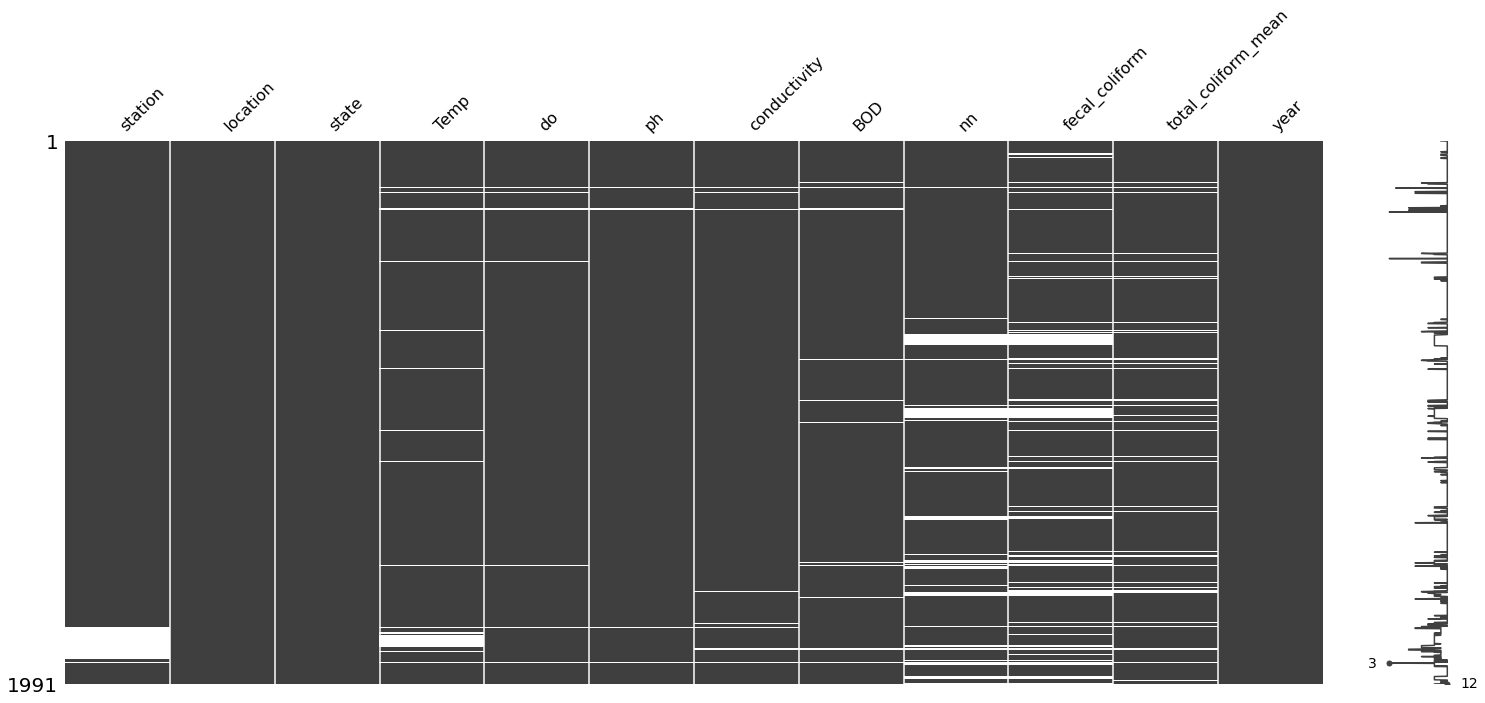

In [226]:
msno.matrix(df)

In [227]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


In [228]:
print(df.station.nunique())
print(df.state.nunique())

320
203


# WQI calculation

## Rating calculation

The recommended values (Si) of all the parameters

In [229]:
do_s = 10
ph_s = 8.5
conductivity_s = 1000
bod_s = 5
nitrate_s = 45
fecal_coliform_s = 100
total_coliform_s = 1000

In [230]:
features = ['conductivity','BOD','nn','fecal_coliform','total_coliform_mean']

In [231]:
df_qi = pd.DataFrame()

In [232]:
df_qi['qi_conductivity']=100*df['conductivity']/(conductivity_s)
df_qi['qi_do']=100*(df['do']-14.6)/(do_s-14.6)
df_qi['qi_ph']=100*(df['ph']-7)/(ph_s-7)
df_qi['qi_bod']=100*(df['BOD'])/(bod_s)
df_qi['qi_nn']=100*(df['nn'])/(nitrate_s)
df_qi['qi_fecal_coliform']=100*(df['fecal_coliform'])/(fecal_coliform_s)
df_qi['qi_total_coliform_mean']=100*(df['total_coliform_mean'])/(total_coliform_s)

In [233]:
df_qi

,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean
0,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7
1,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1
2,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0
3,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3
4,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0
...,...,...,...,...,...,...,...
1986,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2
1987,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5
1988,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0
1989,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2


In [234]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


Parameter weights

In [235]:
do_w = 0.2213
ph_w = 0.2604
conductivity_w = 0.0022
bod_w = 0.4426
n_w = 0.0492
fecal_coliform_w = 0.0221
total_coliform_w = 0.0022
w_total =  1

In [236]:
df2 = pd.concat([df,df_qi],axis=1)

In [237]:
df2

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2


In [238]:
df2['wqi']=df2['qi_conductivity']*conductivity_w+\
           df2['qi_do']*do_w+\
           df2['qi_ph']*ph_w+\
           df2['qi_bod']*bod_w+\
           df2['qi_nn']*n_w+\
           df2['qi_fecal_coliform']*fecal_coliform_w+\
           df2['qi_total_coliform_mean']*total_coliform_w

In [239]:
df2

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean,wqi
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7,NaN
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1,175.363506
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0,126.135831
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3,195.105659
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0,141.393246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2,12746.407333
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5,10091.343432
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0,NaN
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2,NaN


# adding the WQI to the original dataframe

In [240]:
df3 = pd.concat([df,df2.wqi],axis=1)

In [241]:
df3

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,NaN
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,175.363506
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,126.135831
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,195.105659
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,141.393246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,12746.407333
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,10091.343432
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,NaN
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,NaN


# Handling missing values

We'll just remove them

<AxesSubplot:>

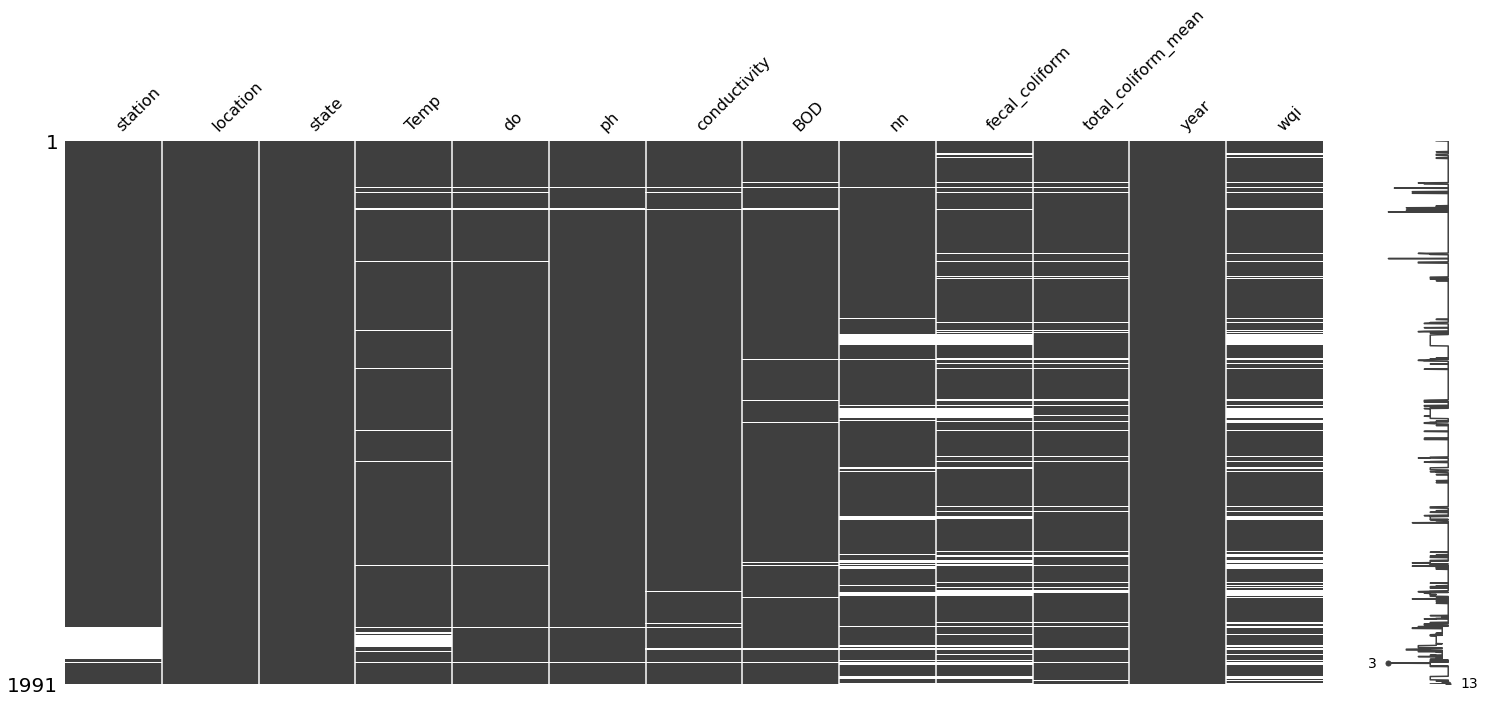

In [242]:
msno.matrix(df3)

In [243]:
df3.isnull().sum()

station                122
location                 0
state                    0
Temp                    92
do                      31
ph                       8
conductivity            25
BOD                     43
nn                     225
fecal_coliform         316
total_coliform_mean    132
year                     0
wqi                    366
dtype: int64

In [244]:
df4= df3.dropna()

In [245]:
df4

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,175.363506
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,126.135831
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,195.105659
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,141.393246
5,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.5,0.100,2853.000,4049.0,2014,127.971746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160.0,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,31.0,7.3,178.0,6.7,1.5,0.138,0.138,190.0,2003,3017.018760
1982,1161.0,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,29.0,7.1,214.0,6.8,2.3,0.585,0.585,350.0,2003,3650.116506
1984,1328.0,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,28.0,6.9,146.0,7.1,2.0,0.506,0.506,38.0,2003,2467.864123
1985,1329.0,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,28.0,7.0,136.0,7.5,1.4,0.609,0.609,205.0,2003,2288.522202


# Feature selection

In [246]:
x = df4[['Temp','do','ph','conductivity','BOD','nn','fecal_coliform','total_coliform_mean']]

In [247]:
y = df4.wqi

In [248]:
y

1         175.363506
2         126.135831
3         195.105659
4         141.393246
5         127.971746
            ...     
1981     3017.018760
1982     3650.116506
1984     2467.864123
1985     2288.522202
1987    10091.343432
Name: wqi, Length: 1528, dtype: float64

# Splitting into training and testing data

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [251]:
x_train

,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean
1472,30.000,2.400,6.700,221.0,2.100,3.970,220.0,660.0
316,28.000,6.900,7.900,131.0,3.500,0.750,41.0,96.0
1336,27.000,7.200,7.700,835.0,2.000,0.700,1550.0,2750.0
1721,26.500,6.733,6.867,324.0,0.933,0.455,1973.0,2233.0
321,24.500,6.700,7.700,141.0,3.300,3.000,4.0,90.0
...,...,...,...,...,...,...,...,...
1761,18.333,4.033,7.667,855.0,21.333,1.767,17433.0,148667.0
1698,27.250,7.125,7.550,418.3,1.725,0.450,18.0,106.0
518,28.000,6.400,6.700,175.0,1.300,0.100,772.0,3636.0
486,20.600,7.400,7.000,69.0,1.600,3.300,17.0,87.0


In [252]:
y_train

1472     77.563682
316      84.687736
1336    100.576668
1721     88.012734
321      79.836690
           ...    
1761    669.612627
1698     61.341296
518      63.659284
486      49.572281
1467     36.724423
Name: wqi, Length: 1069, dtype: float64

# SVR Pipeline: Predicting WQI

In [253]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [254]:
pipeline = Pipeline([
    ("Std scaling", StandardScaler()),
    ("SVR",SVR(kernel="poly",C=5,gamma="auto",degree=3,epsilon=0.1,coef0=1))
     ])

In [255]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Std scaling', StandardScaler()),
                ('SVR', SVR(C=5, coef0=1, gamma='auto', kernel='poly'))])

In [256]:
y_pred = pipeline.predict(x_test)

# SVR performance

In [257]:
from sklearn.metrics import mean_absolute_error,r2_score,explained_variance_score

In [258]:
r2_score(y_test,y_pred)

0.46985041352372636

In [259]:
mean_absolute_error(y_test,y_pred)

6333.353312776647

In [260]:
explained_variance_score(y_test,y_pred)

0.4714826274879622

## Visualize performance

In [261]:
y_pred

array([ 5.83701230e+02,  1.33338866e+02,  1.69234623e+02,  6.17666604e+01,
        1.08560384e+02,  1.24297791e+02,  7.24994191e+01,  5.97971318e+01,
        5.66861983e+01,  1.56260862e+02,  6.69222951e+01,  6.83832172e+01,
        7.35167682e+01,  5.45140166e+01,  5.81961072e+01,  5.88876126e+01,
        7.30995718e+01,  1.38377180e+02,  6.54685410e+01,  7.26983103e+01,
        7.18629845e+01,  9.01301994e+05,  7.70464664e+01,  6.45406236e+01,
        6.31547472e+01,  9.98934018e+01,  7.19213528e+01,  5.81292992e+01,
        6.40279066e+01,  5.32684836e+01,  6.88343736e+01,  6.31089047e+01,
        2.03475799e+02,  6.36990713e+01,  7.20804166e+01,  5.61066993e+01,
        7.27014240e+01,  6.80601505e+01,  8.23764664e+01,  5.45016079e+01,
        6.27757468e+02,  8.65392550e+01,  5.88355895e+01,  7.21773634e+01,
        6.33753988e+01,  6.62606757e+01,  2.14565799e+02,  1.42187703e+02,
        5.91687431e+01,  7.87318562e+01,  5.51627471e+01,  1.72894822e+02,
        5.68067152e+01,  

In [262]:
y_test

510     617.204823
1559    138.747788
1645    525.695478
905      68.315965
1231    120.685182
           ...    
911      57.609654
529      49.062301
966     828.147194
1350     45.728574
1462     41.998507
Name: wqi, Length: 459, dtype: float64

In [263]:
print('max')
print(y_pred.max())
print(y_test.max())
print('mean')
print(y_pred.mean())
print(y_test.mean())
print('std')
print(y_pred.std())
print(y_test.std())

max
901301.9935497248
3325867.186019131
mean
2557.7877733597597
8865.411093707786
std
42997.962800207024
156297.0601839467


In [264]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [265]:
fig = px.scatter(x=y_test,y=y_pred
)
fig.show()

# WQC determination

Excellent = 5
Good = 4
Poor = 3
Very Poor = 2
Unsuitable for drinking = 1

In [266]:
def calc_wqc(wqi):
    WQI = wqi
    if WQI<=25:
        WQC=5
    elif WQI>25 and WQI<=50:
        WQC=4
    elif WQI>50 and WQI<=75:
        WQC=3
    elif WQI>75 and WQI<=100:
        WQC=2
    elif WQI>100:
        WQC=1
    return WQC

In [267]:
wqc = []
for i in df4.wqi:
    wqc.append(calc_wqc(i))

In [268]:
df4['wqc']=wqc

C:\Users\kople\AppData\Local\Temp\ipykernel_4492\1716196689.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
df4

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi,wqc
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,175.363506,1
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,126.135831,1
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,195.105659,1
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,141.393246,1
5,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.5,0.100,2853.000,4049.0,2014,127.971746,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160.0,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,31.0,7.3,178.0,6.7,1.5,0.138,0.138,190.0,2003,3017.018760,1
1982,1161.0,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,29.0,7.1,214.0,6.8,2.3,0.585,0.585,350.0,2003,3650.116506,1
1984,1328.0,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,28.0,6.9,146.0,7.1,2.0,0.506,0.506,38.0,2003,2467.864123,1
1985,1329.0,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,28.0,7.0,136.0,7.5,1.4,0.609,0.609,205.0,2003,2288.522202,1


In [270]:
df4.describe()

,station,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi,wqc
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1.528000e+03,1.528000e+03,1528.000000,1.528000e+03,1528.000000
mean,1946.056937,26.284840,6.332807,70.785863,1798.718606,4.906314,1.410666,3.964382e+05,6.445488e+05,2010.580497,1.009416e+04,2.437173
std,777.965463,3.272678,1.290948,1128.956395,5279.702522,17.519698,2.838844,9.176190e+06,1.569837e+07,2.754065,2.071335e+05,1.069910
min,17.000000,10.000000,0.000000,2.600000,3.700000,0.100000,0.000000,0.000000e+00,4.000000e+00,2003.000000,-1.057922e+01,1.000000
25%,1442.000000,25.000000,5.900000,6.900000,73.000000,1.100000,0.250000,3.000000e+01,1.407500e+02,2009.000000,5.423292e+01,1.000000
50%,1705.000000,27.000000,6.700000,7.200000,165.000000,1.700000,0.508000,2.280000e+02,5.910000e+02,2011.000000,7.202600e+01,3.000000
75%,2338.000000,28.325000,7.100000,7.600000,612.750000,3.400000,1.437500,9.642500e+02,2.259500e+03,2013.000000,1.068747e+02,3.000000
max,3473.000000,35.000000,10.000000,28598.000000,47156.000000,534.500000,58.100000,2.725216e+08,5.110909e+08,2014.000000,6.136170e+06,5.000000
